**Projeto 2 | Modelagem e Simulação do Mundo Físico** 1B Engenharia - Lucas Fontenla & Victor Hugo Leal

Em dias chuvosos (nublados), os passageiros que utilizam transporte público fecham as janelas para evitar a entrada de água no veículo, porém, conforme o horário do rush se aproxima, mais pessoas entram no ônibus e a temperatura interna do ônibus aumenta muito. 

1. Como o número de pessoas afeta a temperatura interna do ônibus?
2. Para que uma determinada empresa aumente o conforto dos passageiros, qual ar condicionado ela deverá instalar no ônibus?

**O modelo:**

<img src="Modelo.jpg">

Fluxos de calor 
1. Qpp - Emitido pelas pessoas de pé
2. Qps - Emitido pelas pessoas sentadas
3. Qac - Absorvido pelo ar condicionado
4. Qp - Que sai pela porta
5. Qj - Que sai pela janela
6. Ql - Que sai pela lataria

Variáveis Exógenas
1. np - Número de pessoas de pé
2. ns - Número de pessoas sentadas
3. t - Tempo de abertura da porta
4. Te - Temperatura externa

**Equação do Modelo:**

<img src="Equação Diferencial.png", width="330", height="56">


**Perda de calor por CONDUÇÃO**

O ar interno fornece calor para o vidro e para a lataria. O fluxo de calor no interior do material se dá por condução

Resistência térmica de condução:

<img src="Rcond.png", width="122", height="45">

1. L: Espessura do material [m]
2. h: Coeficiente de condutividade térmica [W/mK]
3. As: Área superficial [m^2]

Fluxo de calor:

<img src="Qcond.png", width="112", height="40">

1. DeltaT - (Temp. Interna - Temp. Externa)


**Perda de calor por CONVECÇÃO**

O vidro, a lataria e quando a porta se abre, o ar interno, trocam calor com o meio externo

Resistência térmica de convecção:

<img src="Rconv.png", width="122", height="45">

1. h: Coeficiente de condutividade térmica [W/mK]
2. As: Área superficial [m^2]

Fluxo de calor:

<img src="Qconv.png", width="112", height="40">

1. DeltaT - (Temp. Interna - Temp. Externa)

**EQUAÇÕES FINAIS**
<img src="Qj.png", width="275">
<img src="Ql.png", width="250">
<img src="Qp.png", width="190">

In [162]:
"""Definição dos Parâmetros"""

hvidro = 0.8 #condutividade térmica do vidro
har = 1 #coeficiente de convecção térmica do ar
haco = 50.2 #condutividade térmica do aço

Lvidro = 0.003 #espessura do aço
Laco = 0.003 #espessura da lataria

Area_lataria = 206.56 #área d lataria em contato com o ar
Area_janela = 21.6 #área da janela em contato com o ar
Area_parabrisa = 4.42 #área do para-brisa
Area_porta = 6.27 #área do ar interno em contato com o ar externo quando a porta aberta

Mar = 203.1
car = 1004.832

numero_ps = 170
Area_pele = 1.8
Tcorporal = (36+273)

Area_vidro_mov = Area_janela + Area_parabrisa + Area_porta #A área em vidro inicial conta como se a porta fosse de vidro
Area_vidro_stop = Area_janela + Area_parabrisa

Rcond_lataria = Laco/(haco*Area_lataria)
Rconv_lataria = 1/(har*Area_lataria)

Rcond_janelas_mov = Lvidro/(hvidro*Area_vidro_mov)
Rconv_janelas_mov = 1/(har*Area_vidro_mov)
Rcond_janelas_stop = Lvidro/(hvidro*Area_vidro_stop)
Rconv_janelas_stop = 1/(hvidro*Area_vidro_stop)

Rconv_porta = 1/(har*Area_porta)

Rconv_pessoas = 1/(har*Area_pele)

In [163]:
def CalculaT_mov(Y, lista_tempo, text):
    dTdt = (numero_ps*((Tcorporal - Y)/Rconv_pessoas) - ((Y - text)/(Rcond_lataria + Rconv_lataria))\
            - ((Y - text)/(Rcond_janelas_mov + Rconv_janelas_mov))) / (Mar*car)
    return dTdt

def CalculaT_stop(Y, lista_tempo, text):
    dTdt = (numero_ps*((Tcorporal - Y)/Rconv_pessoas) - ((Y - text)/(Rcond_lataria + Rconv_lataria))\
            - ((Y - text)/(Rcond_janelas_stop + Rconv_janelas_stop)) - ((Y - text)/(Rconv_porta))) / (Mar*car)
    return dTdt

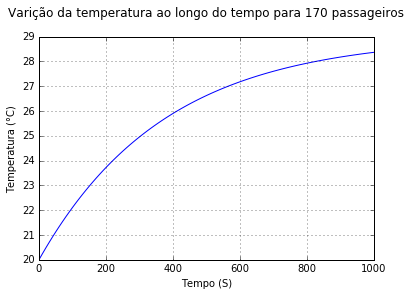

In [164]:
"""Verificação da função: cálculo de dTdt (em mov.) para um intervalo de Xs"""
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

lista_tempo = linspace(0, 1000, 100)

T0 = Texterna = (20 + 273) #20°C para Kelvin

T = odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273

plt.plot(lista_tempo, T[:,0])
plt.title("Varição da temperatura ao longo do tempo para 170 passageiros\n")
plt.xlabel("Tempo (S)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

**Como o sistema se comporta para diferentes números de pessoas?**

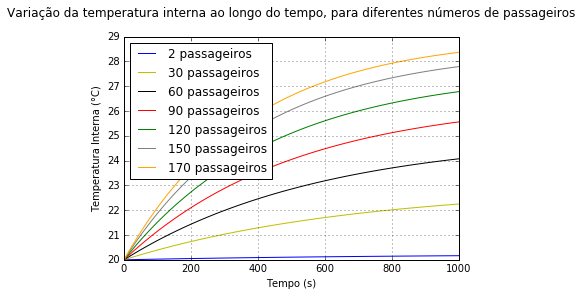

In [165]:
"Valores para análise: 0, 30, 60, 90, 120, 150, 170"

T = list()
Val_analise = [2, 30, 60, 90, 120, 150, 170]

for i in Val_analise:
    numero_ps = i
    T.append(odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273)
    
plt.plot(lista_tempo, T[0], "b", label="2 passageiros")
plt.plot(lista_tempo, T[1], "y", label="30 passageiros")
plt.plot(lista_tempo, T[2], "black", label="60 passageiros")
plt.plot(lista_tempo, T[3], "r", label="90 passageiros")
plt.plot(lista_tempo, T[4], "g", label="120 passageiros")
plt.plot(lista_tempo, T[5], "grey", label="150 passageiros")
plt.plot(lista_tempo, T[6], "orange", label="170 passageiros")
plt.legend(loc="best")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.title("Variação da temperatura interna ao longo do tempo, para diferentes números de passageiros\n")
plt.grid(True)
plt.show()


**Quando a porta se abre, mais calor sai do ônibus. A ação dura apenas 20s**

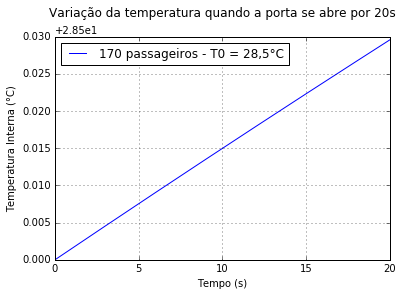

In [166]:
"""Calcula T quando no ponto, supondo a temperatura máxima interna para 170 passageiros ~28,5°C"""
T = list()
lista_tempo = linspace(0, 20, 200)
numero_ps = 170

T0 = (28.5 + 273)
Texterna = (20 + 273)

T = odeint(CalculaT_stop, T0, lista_tempo, args=(Texterna,)) - 273

plt.plot(lista_tempo, T, "b", label="170 passageiros - T0 = 28,5°C")
plt.legend(loc="best")
plt.title("Variação da temperatura quando a porta se abre por 20s\n")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.grid(True)
plt.show()


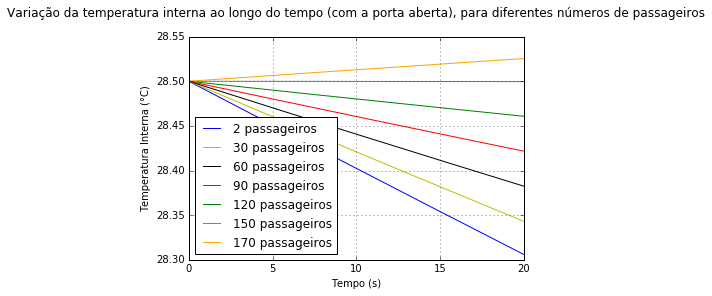

In [167]:
"""Variação da temperatura quando a porta se abre, para diferentes valores de passageiros"""
T = list()
Val_analise = [2, 30, 60, 90, 120, 150, 170]
lista_tempo = linspace(0, 20, 200)

for i in Val_analise:
    numero_ps = i
    T.append(odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273)
    
plt.plot(lista_tempo, T[0], "b", label="2 passageiros")
plt.plot(lista_tempo, T[1], "y", label="30 passageiros")
plt.plot(lista_tempo, T[2], "black", label="60 passageiros")
plt.plot(lista_tempo, T[3], "r", label="90 passageiros")
plt.plot(lista_tempo, T[4], "g", label="120 passageiros")
plt.plot(lista_tempo, T[5], "grey", label="150 passageiros")
plt.plot(lista_tempo, T[6], "orange", label="170 passageiros")
plt.legend(loc="best")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.title("Variação da temperatura interna ao longo do tempo (com a porta aberta), para diferentes números de passageiros\n")
plt.grid(True)
plt.show() 

**Simulação de uma viagem com 50 passageiros | **Seguindo os padrões da linha do ônibus, sendo elas, 50 paradas, porém, o ônibus tem um número constante de 50 pessoas (contando os funcionários). O tempo entre as paradas é de 150s e, na parada, o ônibus mantém a porta aberta durante 20s

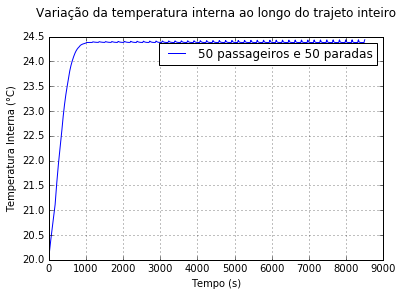

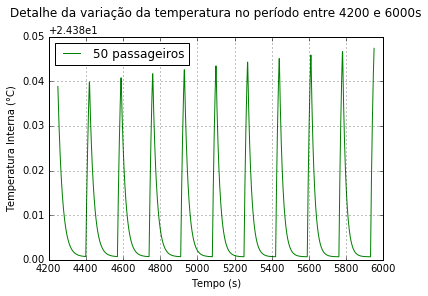

In [168]:
T = list() #lista com as temperaturas
P = list() #lista parcial que armazena a variação de temperatura trecho + parada

numero_ps = 50
T0 = Texterna = (20 + 273) #20°C para Kelvin

for i in range(1, 51):
    lista_tempo = linspace(0*i, 150*i, 150)
    P.append(odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273)
    T0 = P[-1][-1] + 273
    lista_tempo = linspace(150*i, 170*i, 20)
    P.append(odeint(CalculaT_stop, T0, lista_tempo, args=(Texterna,)) - 273)
    T0 = P[-1][-1] + 273
    
lista_tempo = linspace(0, 170*(51-1), 170*(51-1))

for j in range(0, 100):
    T += list(P[j])
    
plt.plot(lista_tempo, T, label="50 passageiros e 50 paradas")
plt.legend(loc="best")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.title("Variação da temperatura interna ao longo do trajeto inteiro\n")
plt.grid(True)
plt.show()

#zoom após ter sido atingida a temperatura máxima
T2 = T[int(len(T)/2) : int(len(T)*.70)] #com a lista de temperaturas a partir da metade do tempo

lista_tempo2 = linspace(170*25, 170*35, 170*10)

plt.plot(lista_tempo2, T2, "g", label="50 passageiros")
plt.legend(loc="best")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.title("Detalhe da variação da temperatura no período entre 4200 e 6000s\n")
plt.grid(True)
plt.show()

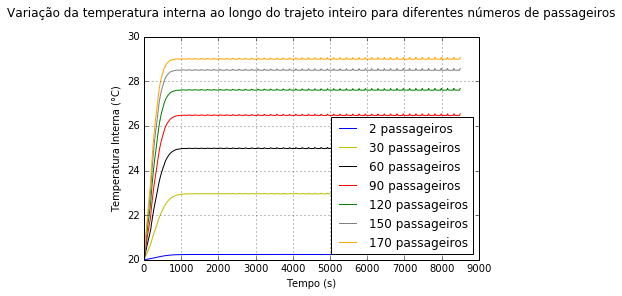

In [169]:
"Mesmo modelo anterior porém com múmero de pessoas diferentes"

T = list() #lista com as temperaturas

T0 = Texterna = (20 + 273) #20°C para Kelvin

lista_tempo = linspace(0, 20, 200)

Val_analise = [2, 30, 60, 90, 120, 150, 170]

for i in Val_analise:
    T0 = 20 + 273
    P = list()  #lista parcial que armazena a variação de temperatura trecho + parada
    P2 = list()
    numero_ps = i
    for i in range(1, 51):
        lista_tempo = linspace(0*i, 150*i, 150)
        P.append(odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273)
        T0 = P[-1][-1] + 273
        lista_tempo = linspace(150*i, 170*i, 20)
        P.append(odeint(CalculaT_stop, T0, lista_tempo, args=(Texterna,)) - 273)
        T0 = P[-1][-1] + 273
    for j in range(0, 100):
        P2 += list(P[j])
    T.append(P2)
lista_tempo = linspace(0, 170*(51-1), 170*(51-1))
    
plt.plot(lista_tempo, T[0], "b", label="2 passageiros")
plt.plot(lista_tempo, T[1], "y", label="30 passageiros")
plt.plot(lista_tempo, T[2], "black", label="60 passageiros")
plt.plot(lista_tempo, T[3], "r", label="90 passageiros")
plt.plot(lista_tempo, T[4], "g", label="120 passageiros")
plt.plot(lista_tempo, T[5], "grey", label="150 passageiros")
plt.plot(lista_tempo, T[6], "orange", label="170 passageiros")
plt.legend(loc="best")
plt.ylabel("Temperatura Interna (°C)")
plt.xlabel("Tempo (s)")
plt.title("Variação da temperatura interna ao longo do trajeto inteiro para diferentes números de passageiros\n")
plt.grid(True)
plt.show()

 **Criação da situação:** O ônibus parte do ponto de partida com 2 pessoas (o cobrador e o motorista). Ao longo do trajeto, o ônibus fará 50 paradas. O tempo entre as paradas é de 150s e, o veículo fica parado com a porta aberta durante 20s. Nas primeiras 25 paradas a variação do número de passageiros é 3, nas 25 últimas, 4.

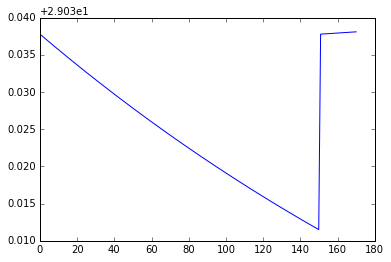

In [170]:
T = list() #zera a lista de temperatura
#Geração das temperaturas para a determinada situação
lista_tempo = linspace(0, 150, 150)

numero_ps = 170
T = list(odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,)) - 273)

lista_tempo = linspace(150, 170, 20)
T += list(odeint(CalculaT_stop, T0, lista_tempo, args=(Texterna,)) - 273)

lista_tempo = linspace(0, 170, 170)

plt.plot(lista_tempo, T)
plt.show()
    

In [171]:
#Lista com o número de pessoas no ônibus
numero_de_passageiros = [2]

for i in range(1, 26): #primeiras 25 paradas
    numero_de_passageiros.append(numero_de_passageiros[i-1]+3)
    
for j in range(26, 51): #ultimas 25 paradas
    numero_de_passageiros.append(numero_de_passageiros[j-1]+4)